# Libraries import


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Remove warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")


# Load dataset

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Check missing values

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Fill missing Age with median

In [6]:
df['age'] = df['age'].fillna(df['age'].median())

In [7]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Check Who survived more: Males or Females?

In [8]:
df.groupby('sex')['survived'].mean()


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

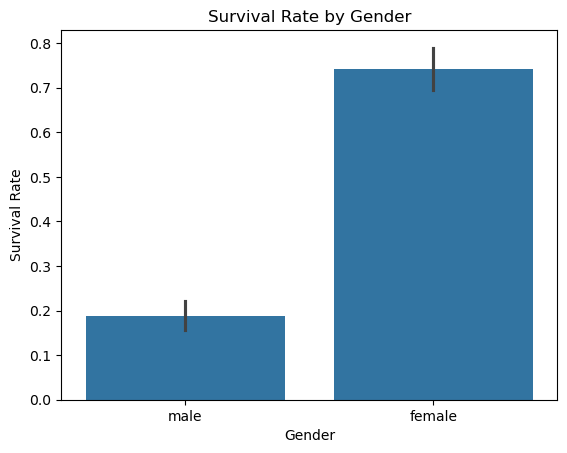

In [9]:
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()


## Females had a much higher survival rate than males.

# Check passenger class affect survival chances?

In [10]:
df.groupby('class')['survived'].mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

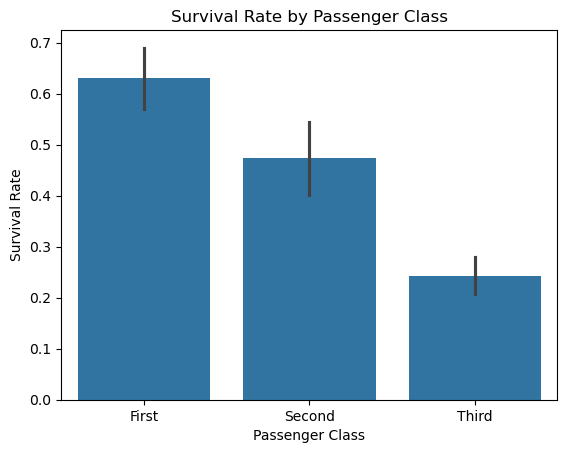

In [11]:
sns.barplot(x='class', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


## First class passengers survived the most

## Third class passengers survived the least

# Survival rate by Age Group

In [12]:
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle Age', 'Senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [13]:
df.groupby('age_group')['survived'].mean()


age_group
Child         0.579710
Teen          0.381818
Adult         0.364769
Middle Age    0.390625
Senior        0.227273
Name: survived, dtype: float64

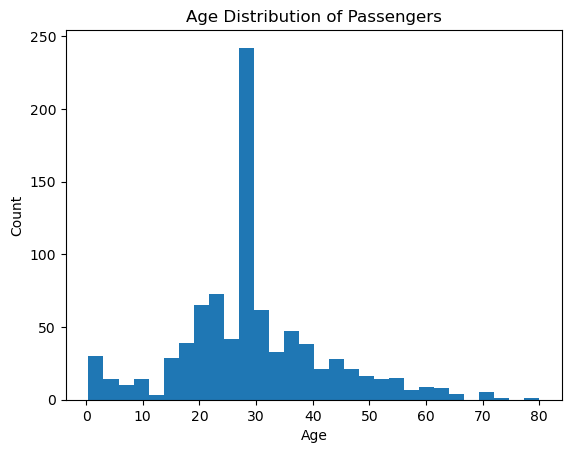

In [14]:
plt.hist(df['age'], bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
